In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mno
import seaborn as sns

In [2]:
data = pd.read_csv('mp_all.csv')

In [3]:
data.head()

,material_id,pretty_formula,e_above_hull,band_gap,total_magnetization,elasticity.elastic_anisotropy,elasticity.K_VRH,elasticity.G_VRH,structure,energy,energy_per_atom,formation_energy_per_atom,initial_structure
0,mp-85,In,0.003319,0.0000,2.700000e-05,1.044699,33.154748,4.904836,"{'@module': 'pymatgen.core.structure', '@class...",-2.721563,-2.721563,0.003319,"{'@module': 'pymatgen.core.structure', '@class..."
1,mp-110,Mg,0.039182,0.0000,-1.360000e-05,-11.326659,35.636106,1.830272,"{'@module': 'pymatgen.core.structure', '@class...",-1.565153,-1.565153,0.039182,"{'@module': 'pymatgen.core.structure', '@class..."
2,mp-20,Be,0.108143,0.0000,1.000000e-07,8.030000,124.000000,84.000000,"{'@module': 'pymatgen.core.structure', '@class...",-14.537871,-3.634468,0.108143,"{'@module': 'pymatgen.core.structure', '@class..."
3,mp-8640,Hf,0.071216,0.0000,-2.050000e-05,0.881277,101.242732,44.836516,"{'@module': 'pymatgen.core.structure', '@class...",-9.883049,-9.883049,0.071216,"{'@module': 'pymatgen.core.structure', '@class..."
4,mp-674158,P,3.509988,2.0113,3.000042e+00,10.884643,0.327165,-0.064038,"{'@module': 'pymatgen.core.structure', '@class...",-1.895193,-1.895193,3.509988,"{'@module': 'pymatgen.core.structure', '@class..."


In [35]:
data['initial_structure'][1]

"{'@module': 'pymatgen.core.structure', '@class': 'Structure', 'lattice': {'matrix': [[2.4111144, 0.0, -0.85245767], [-1.2055572, 2.08808632, -0.85245767], [0.0, 0.0, 2.55737302]], 'a': 2.5573730132753787, 'b': 2.5573730117808022, 'c': 2.55737302, 'alpha': 109.47122062038486, 'beta': 109.47122060854622, 'gamma': 109.47122067227382, 'volume': 12.87538855326472}, 'sites': [{'species': [{'element': 'Mg', 'occu': 1}], 'abc': [0.0, 0.0, 0.0], 'xyz': [0.0, 0.0, 0.0], 'label': 'Mg'}]}"

In [4]:
data.columns

Index(['material_id', 'pretty_formula', 'e_above_hull', 'band_gap',
       'total_magnetization', 'elasticity.elastic_anisotropy',
       'elasticity.K_VRH', 'elasticity.G_VRH', 'structure', 'energy',
       'energy_per_atom', 'formation_energy_per_atom', 'initial_structure'],
      dtype='object')

In [4]:
data = data.drop(columns=['e_above_hull', 'band_gap','total_magnetization', 'energy','energy_per_atom', 'structure',
                          'formation_energy_per_atom', 'initial_structure'])

In [6]:
data.head()

,material_id,pretty_formula,elasticity.elastic_anisotropy,elasticity.K_VRH,elasticity.G_VRH
0,mp-85,In,1.044699,33.154748,4.904836
1,mp-110,Mg,-11.326659,35.636106,1.830272
2,mp-20,Be,8.030000,124.000000,84.000000
3,mp-8640,Hf,0.881277,101.242732,44.836516
4,mp-674158,P,10.884643,0.327165,-0.064038


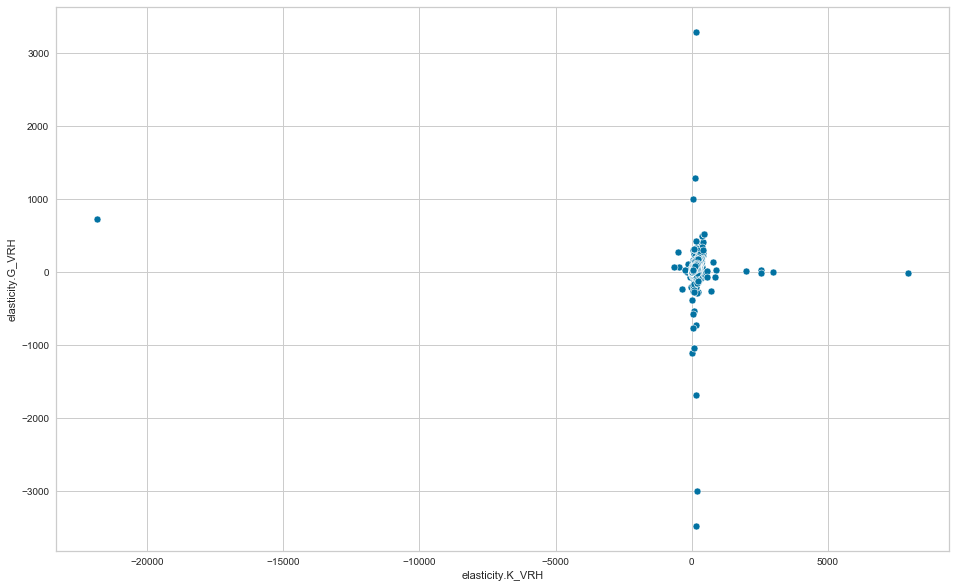

In [10]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.scatterplot(x=data['elasticity.K_VRH'], y=data['elasticity.G_VRH'])

In [14]:
data.describe()

,elasticity.elastic_anisotropy,elasticity.K_VRH,elasticity.G_VRH
count,7676.000000,7676.000000,7676.000000
mean,3.731337,105.175987,47.925097
std,415.327469,282.756557,88.804893
min,-13432.529515,-21843.000000,-3476.434485
25%,0.141947,45.000000,18.396291
50%,0.511829,94.202871,38.626626
75%,1.633226,154.000000,71.530068
max,30571.028103,7960.000000,3295.183506


In [24]:
df = data[(data['elasticity.K_VRH'] < 500) & (data['elasticity.G_VRH'] < 250) & (data['elasticity.K_VRH'] > -100) & (data['elasticity.G_VRH'] > -100)]


In [9]:
df.describe()

,elasticity.elastic_anisotropy,elasticity.K_VRH,elasticity.G_VRH
count,7591.000000,7591.000000,7591.000000
mean,3.728840,104.971193,48.677943
std,417.605331,72.845500,41.957822
min,-13432.529515,-71.000000,-99.355700
25%,0.148540,45.000000,18.636725
50%,0.518748,93.968893,38.709394
75%,1.644573,153.290647,71.278388
max,30571.028103,411.288292,248.879140


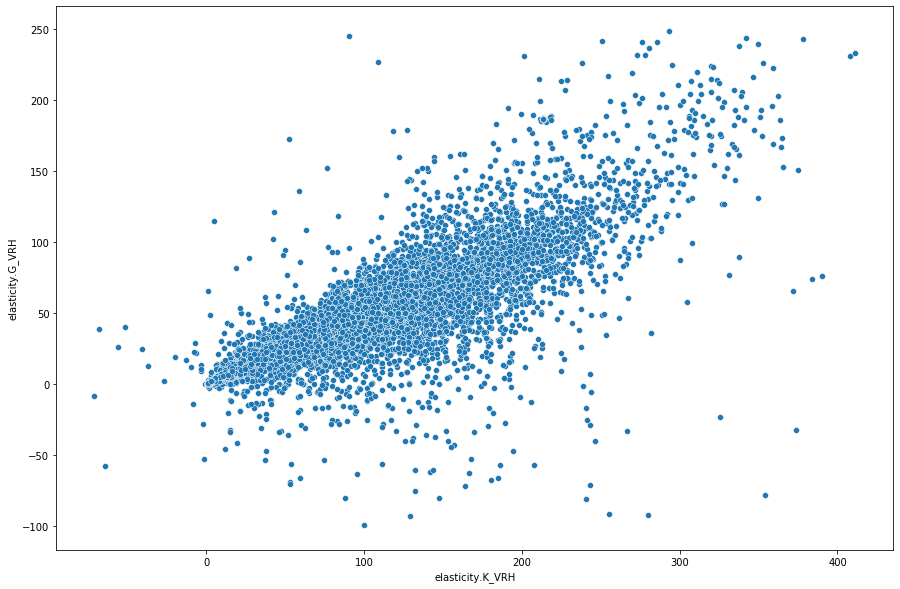

In [45]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.scatterplot(x=df['elasticity.K_VRH'], y=df['elasticity.G_VRH'])

In [5]:
import os

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

In [17]:
data = data.dropna()
data.iloc[:, 2:5]

,elasticity.elastic_anisotropy,elasticity.K_VRH,elasticity.G_VRH
0,1.044699,33.154748,4.904836
1,-11.326659,35.636106,1.830272
2,8.030000,124.000000,84.000000
3,0.881277,101.242732,44.836516
4,10.884643,0.327165,-0.064038
...,...,...,...
81644,0.700207,51.737266,11.896905
82208,0.388816,55.179580,22.661890
82259,0.620832,58.416506,22.543285
82833,397.297866,118.462873,91.024121


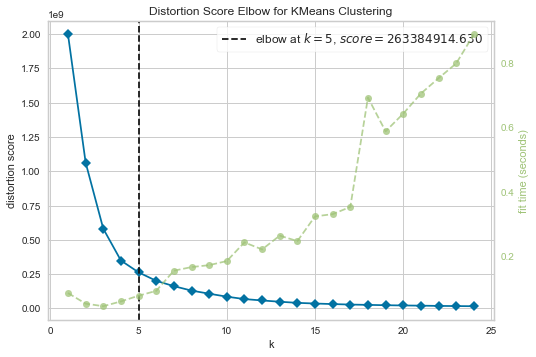

In [25]:
features = data.iloc[:, 2:5]
#target = dataset.iloc[:, -1]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,25))

visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof()

In [30]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(features)
cluster_labels = kmeans.fit_predict(features)

kmeans.cluster_centers_

array([[ 1.97510145e+00,  1.08071354e+02,  4.78589794e+01],
       [ 3.05710281e+04,  1.10902653e+02,  1.50760882e+01],
       [-8.25000000e+00, -2.18430000e+04,  7.34000000e+02],
       [ 9.28894129e+03,  1.06345327e+02,  2.88803531e+01],
       [-8.78633464e+03,  1.64477916e+01,  5.57256644e+00]])

In [31]:
np.isnan(cluster_labels).any()

False

In [32]:
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.9855935394543212


In [33]:
from pyclustering.cluster.kmedoids import kmedoids

In [37]:
# Randomly pick 3 indexs from the original sample as the mediods
initial_medoids = [50, 170, 1024, 2048, 4096]

# Create instance of K-Medoids algorithm with prepared centers.
kmedoids_instance = kmedoids(features.values.tolist(), initial_medoids)

# Run cluster analysis.
kmedoids_instance.process()

# predict function is not availble in the release branch yet.
# cluster_labels = kmedoids_instance.predict(features.values)

clusters = kmedoids_instance.get_clusters()

# Prepare cluster labels
cluster_labels = np.zeros([data.shape[0]], dtype=int)
for x in np.nditer(np.asarray(clusters[1])):
   cluster_labels[x] = 1
for x in np.nditer(np.asarray(clusters[2])):
   cluster_labels[x] = 2
for x in np.nditer(np.asarray(clusters[3])):
   cluster_labels[x] = 3
for x in np.nditer(np.asarray(clusters[4])):
   cluster_labels[x] = 4

cluster_labels

array([4, 4, 4, ..., 4, 4, 4])

In [35]:
# Mediods found in above clustering, indexes are shouwn below.
kmedoids_instance.get_medoids()

[491, 5197, 6904, 5844, 191]

In [36]:
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.9852400804968715


In [11]:
# with outlier removal
df = df.dropna()
df.iloc[:, 2:5]

,elasticity.elastic_anisotropy,elasticity.K_VRH,elasticity.G_VRH
0,1.044699,33.154748,4.904836
1,-11.326659,35.636106,1.830272
2,8.030000,124.000000,84.000000
3,0.881277,101.242732,44.836516
4,10.884643,0.327165,-0.064038
...,...,...,...
81644,0.700207,51.737266,11.896905
82208,0.388816,55.179580,22.661890
82259,0.620832,58.416506,22.543285
82833,397.297866,118.462873,91.024121


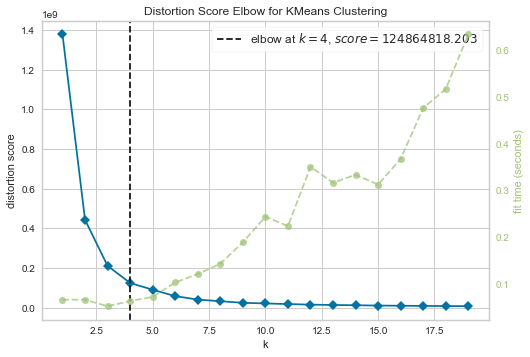

In [15]:
features = df.iloc[:, 2:5]
#target = dataset.iloc[:, -1]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof()

In [16]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(features)
cluster_labels = kmeans.fit_predict(features)

kmeans.cluster_centers_

array([[ 1.95157664e+00,  1.05005238e+02,  4.87020292e+01],
       [ 3.05710281e+04,  1.10902653e+02,  1.50760882e+01],
       [-8.78633464e+03,  1.64477916e+01,  5.57256644e+00],
       [ 9.28894129e+03,  1.06345327e+02,  2.88803531e+01]])

In [14]:
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.5159173839090453


In [19]:
# Randomly pick 3 indexs from the original sample as the mediods
initial_medoids = [1, 1024, 2048, 4096]

# Create instance of K-Medoids algorithm with prepared centers.
kmedoids_instance = kmedoids(features.values.tolist(), initial_medoids)

# Run cluster analysis.
kmedoids_instance.process()

# predict function is not availble in the release branch yet.
# cluster_labels = kmedoids_instance.predict(features.values)

clusters = kmedoids_instance.get_clusters()

# Prepare cluster labels
cluster_labels = np.zeros([data.shape[0]], dtype=int)
for x in np.nditer(np.asarray(clusters[1])):
   cluster_labels[x] = 1
for x in np.nditer(np.asarray(clusters[2])):
   cluster_labels[x] = 2

cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [23]:
# Mediods found in above clustering, indexes are shouwn below.
a =kmedoids_instance.get_medoids()
a

[5125, 2353, 5771, 6822]

In [25]:
df.iloc[a,:]

,material_id,pretty_formula,elasticity.elastic_anisotropy,elasticity.K_VRH,elasticity.G_VRH
24703,mp-769661,CoAgO3,30571.028103,110.902653,15.076088
8284,mp-1526,TiHg,1.030095,104.196657,48.764318
28196,mp-19395,MnO2,9288.941292,106.345327,28.880353
42418,mp-8537,S(OF)2,-7112.704391,1.894797,1.224272
